# Morphology

形態學  
主要用於二值圖像  
對影像作侵蝕與膨脹來取得如影像的邊界或是一些連通部位  
修整毛邊或是濾掉零碎圖等等的    
都可以利用形態學的手法處理  

利用一張有雜訊的小人來做處理

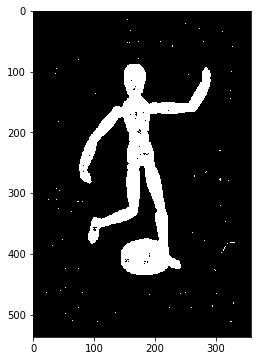

In [2]:
import os 
import cv2 as cv
import matplotlib.pyplot as plt

root = os.getcwd()
img_path = os.path.join(root,'Image/blobModelNoise.jpg')

img = cv.imread(img_path,0)
ret, img = cv.threshold(img,128,255,cv.THRESH_BINARY)

plt.figure(figsize=(6,6))
plt.imshow(img,'gray')

## erode  

侵蝕  
簡單的概念就是把物體的結構消融一圈  
其中必須定義結構元素  
利用該結構元素來對圖形做消融  
如果物體比結構元素大，那麼物體就會縮小  
如果物體比結構元素小，那麼物體就會消失
如果物體中有微弱的聯通，消融後就會分為兩個物體  
opencv中利用erode  
erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])  
* kernel: 侵蝕結構元素，預設為3x3矩形
* anchor: 起始點，預設為圖形中間
* iterations: 侵蝕次數

關於結構元素  
可以利用getStructuringElement來定義  
分別傳入shape與size，會回傳一個矩陣kernel  
shape有三種選擇MORPH_RECT、MORPH_CROSS、MORPH_ELLIPSE 

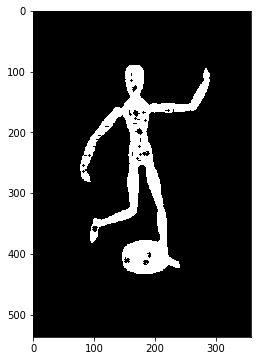

In [3]:
kernel = cv.getStructuringElement(1,(5,5))

img_e = cv.erode(img,kernel,iterations=1)

plt.figure(figsize=(6,6))
plt.imshow(img_e,'gray')

可以看到微小結構的雜點都被消除了  
但是圖片內本身的破損結構卻被放大

## dilate  

膨脹  
與侵蝕相反的概念
一樣必須定義結構元素  
利用該結構元素來對圖形做膨脹  
讓物體的結構長大一圈  
靠近的物體會連在一起  
物件有微小的缺陷會被填補
opencv中利用dilate  
dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])
* kernel: 侵蝕結構元素，預設為3x3矩形
* anchor: 起始點，預設為圖形中間
* iterations: 侵蝕次數

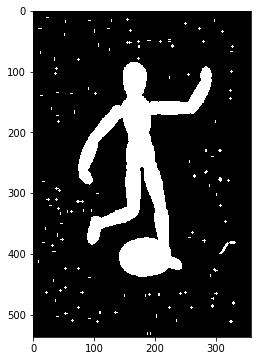

In [4]:
img_d = cv.dilate(img,kernel,iterations=1)

plt.figure(figsize=(6,6))
plt.imshow(img_d,'gray')

可以看到物件內的雜訊都被消除了  
但是周圍的雜點就被放大

## Application-1

### 消除雜訊

在二值結構圖中  
可以利用先消除後膨脹來讓雜點消失

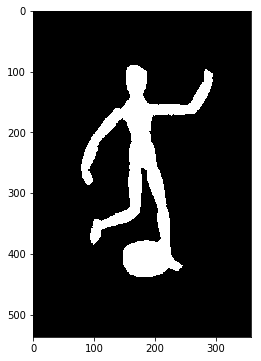

In [5]:
img2=img.copy()

kernel = cv.getStructuringElement(1,(6,6))
img2 = cv.erode(img2,kernel,iterations=1)
img2 = cv.dilate(img2,kernel,iterations=2)
img2 = cv.erode(img2,kernel,iterations=1)
img2 = cv.dilate(img2,kernel,iterations=1)
img2 = cv.erode(img2,kernel,iterations=1)

plt.figure(figsize=(6,6))
plt.imshow(img2,'gray')

## Application-2

## 取得邊界
可以利用原圖物件消融一圈的圖像當作內容  
把原圖減去內容後，能夠得到物件的邊界

(<matplotlib.axes._subplots.AxesSubplot at 0x1da2a3d6160>,
 <matplotlib.image.AxesImage at 0x1da2a425710>)

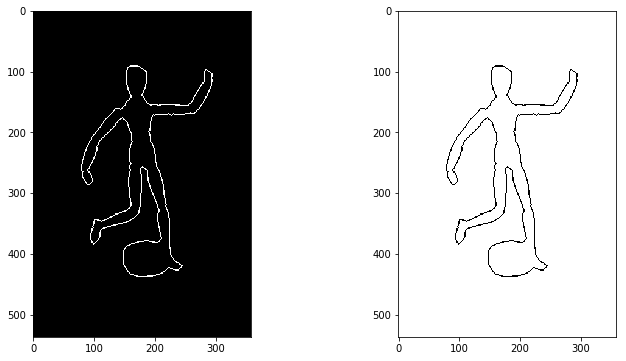

In [6]:
kernel = cv.getStructuringElement(1,(5,5))

img3 = cv.erode(img2,kernel,iterations=1)

Res = img2-img3

otu, Res_INV = cv.threshold(Res,127,255,cv.THRESH_BINARY_INV)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1),plt.imshow(Res,'gray')
plt.subplot(1,2,2),plt.imshow(Res_INV,'gray')